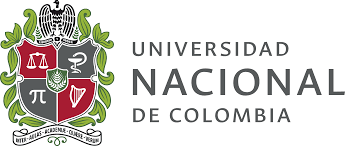

## Pasos para realizar una regresión lineal múltiple con Python

**1). Importar los siguientes módulos o paquetes:**

Éstos son necesarios para realizar la regresión lineal múltiple.

In [1]:
import pandas as pd                    ## Este proporciona una estructura similiar a los data.frame
import statsmodels.api as sm           ## Este proporciona funciones para la estimación de muchos modelos estadísticos
import statsmodels.formula.api as smf  ## Permite ajustar modelos estadísticos utilizando fórmulas de estilo R

**2). Leer la base de datos:**

Para esto, se usará la función **read_csv** del paquete **pandas**.

In [2]:

file = 'https://raw.githubusercontent.com/fhernanb/Python-para-estadistica/master/03%20Regression/Regresi%C3%B3n%20lineal%20m%C3%BAltiple/softdrink.csv'
dt = pd.read_csv(file)

**3). Estructura y primeras observaciones de la base de datos:**

En este paso, se debe observar el conjunto de datos importados, con el fin de familiarizarse con las características esenciales de los datos. 

In [3]:
dt.head()         # Sirve para mostrar la parte inicial de los datos 
                  # dt.head(15) muestra las 15 primeras observaciones
                  # (Existen más funciones importantes y complementarias para ésto)

Obs      y  x1   x2
0    1  16.68   7  560
1    2  11.50   3  220
2    3  12.03   3  340
3    4  14.88   4   80
4    5  13.75   6  150

**4). Diagrama de dispersión:**

Éste gráfico ayuda a analizar la forma en la que variables están relacionadas. (Es opcional, pero útil).

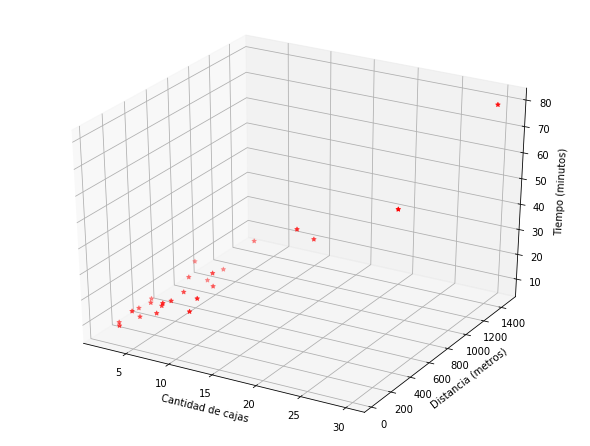

In [5]:
from matplotlib import pyplot             # Permite la generación de gráficos
from mpl_toolkits.mplot3d import Axes3D   # Permite agregar eje tridimensionales
import random                             # Permiten obtener de distintos modos números aleatorios

fig = pyplot.figure(figsize=(8, 6))       # Ajustes del gráfico
ax = Axes3D(fig)

x1 = dt["x1"]                             # Datos eje X
x2 = dt["x2"]                             # Datos eje Y
y = dt["y"]                               # Datos eje Z (Var. Respuesta)

ax.scatter(x1, x2, y, marker='*', c='r')
ax.set_xlabel('Cantidad de cajas')        # Etiqueta del eje X
ax.set_ylabel('Distancia (metros)')       # Etiqueta del eje Y
ax.set_zlabel('Tiempo (minutos)');        # Etiqueta del eje Z (Var. Respuesta)

**5). Ajustar el modelo de regresión mediante fórmulas:**

Para ésto, se usa **statsmodels.api**.

In [6]:
mod = smf.ols('y ~ x1 + x2', data=dt).fit()  # Ajusta el modelo usando el registro natural de uno de los regresores

**6). Resumen del modelo ajustado:**

In [7]:
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     261.2
Date:                Sun, 02 Jun 2019   Prob (F-statistic):           4.69e-16
Time:                        15:38:16   Log-Likelihood:                -63.415
No. Observations:                  25   AIC:                             132.8
Df Residuals:                      22   BIC:                             136.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3412      1.097      2.135      0.0

**7). Extraer los $\beta$ estimados:**

In [8]:
mod.params

Intercept    2.341231
x1           1.615907
x2           0.014385
dtype: float64

**8). Extraer el $\sigma^2$ estimado:** 

Para esto se usa el atributo **mse.resid** sobre el objeto mod.



In [9]:
mod.mse_resid

10.624167155479673

**8). Agregar el plano de regresión:**

(200, 200)


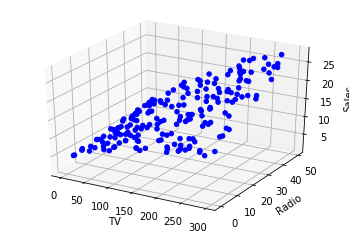

In [10]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
from matplotlib import cm

csv = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
model = sm.ols(formula='sales ~ TV + radio', data = csv)
fit = model.fit()

fit.summary()

xx, yy = np.meshgrid(csv['TV'], csv['radio'])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x_surf = np.arange(0, 350, 20)                # generar una malla
y_surf = np.arange(0, 60, 4)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

exog = pd.core.frame.DataFrame({'TV': x_surf.ravel(), 'radio': y_surf.ravel()})
out = fit.predict(exog = exog)

exog = pd.core.frame.DataFrame({'TV':xx.ravel(),'radio':yy.ravel()})
out = fit.predict(exog=exog)

#ax.plot_surface(xx, yy, out.reshape(xx.shape), color='None')

print(xx.shape)

ax.scatter(csv['TV'], csv['radio'], csv['sales'],
           c='blue',
           marker='o',
           alpha=1)



ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')

plt.show()

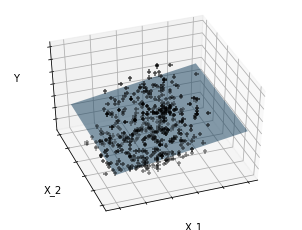

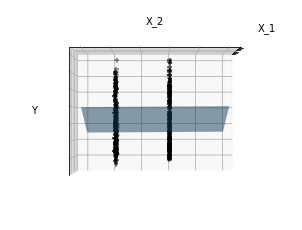

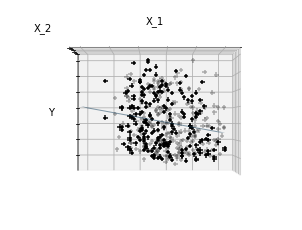

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

from sklearn import datasets, linear_model

diabetes = datasets.load_diabetes()
indices = (0, 1)

X_train = diabetes.data[:-20, indices]
X_test = diabetes.data[-20:, indices]
y_train = diabetes.target[:-20]
y_test = diabetes.target[-20:]

ols = linear_model.LinearRegression()
ols.fit(X_train, y_train)


# #############################################################################
# Traza la figura
def plot_figs(fig_num, elev, azim, X_train, clf):
    fig = plt.figure(fig_num, figsize=(4, 3))
    plt.clf()
    ax = Axes3D(fig, elev=elev, azim=azim)

    ax.scatter(X_train[:, 0], X_train[:, 1], y_train, c='k', marker='+')
    ax.plot_surface(np.array([[-.1, -.1], [.15, .15]]),
                    np.array([[-.1, .15], [-.1, .15]]),
                    clf.predict(np.array([[-.1, -.1, .15, .15],
                                          [-.1, .15, -.1, .15]]).T
                                ).reshape((2, 2)),
                    alpha=.5)
    ax.set_xlabel('X_1')
    ax.set_ylabel('X_2')
    ax.set_zlabel('Y')
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])

# Generar las tres diferentes figuras desde distintas perspectivas
elev = 43.5
azim = -110
plot_figs(1, elev, azim, X_train, ols)

elev = -.5
azim = 0
plot_figs(2, elev, azim, X_train, ols)

elev = -.5
azim = 90
plot_figs(3, elev, azim, X_train, ols)

plt.show()

**Fuente:** la base de datos utilizada son del ejemplo 2.1 del libro de Montgomery, Peck and Vining (2003). Además, dicha base se encuentra alojada en el Github del profesor Freddy Hernández Barajas, https://github.com/fhernanb. 

**Documento creado por Yuberth Anderson Saavedra Coneo, durante el curso Análisis de Regresión de la Universidad Nacional de Colombia sede Medellín**.